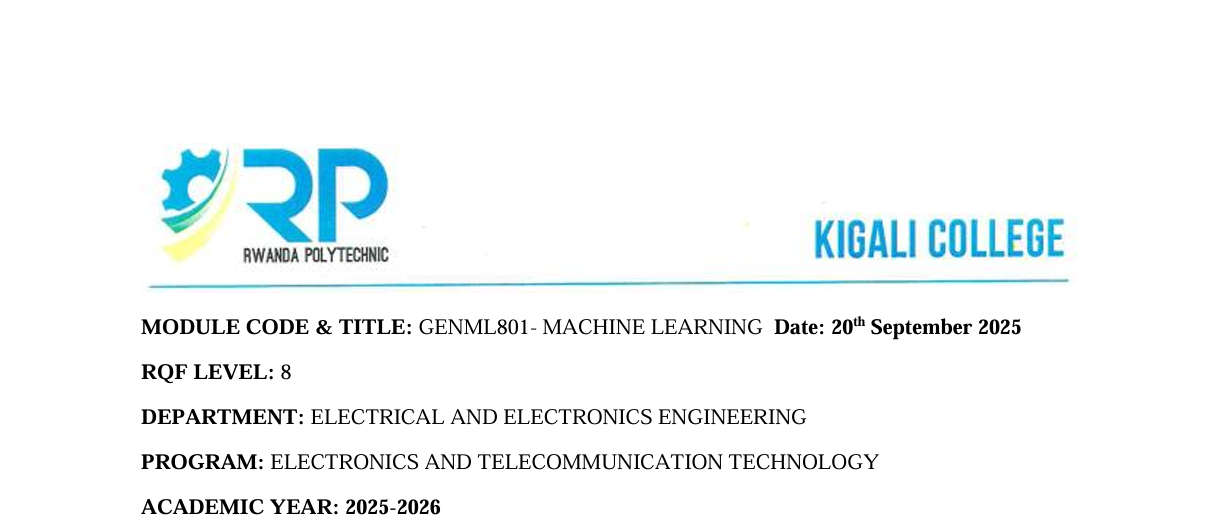

NAME: BYISHIMO Joseph

Reg no: 25RP19781


Title:Machine Learning-Based Smart Cold Room Monitoring System for Food Preservation


This project applies Machine Learning techniques to monitor and predict the condition of cold rooms 
used for preserving perishable foods such as milk, meat, and fruits. The dataset contains temperature 
and humidity readings, which are key factors influencing food spoilage.

The workflow of this project includes:
1. importing necessary libraries
2.  Loading and inspecting the dataset.
3. Performing Exploratory Data Analysis (EDA) to understand patterns.
4. Feature engineering and preprocessing.
5. Building a Random Forest Classifier to predict Normal comditions vs Abnormal conditions (where 0 stand for normal condition and 1 stands for abnormal condition.
6. Evaluating the model using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.
7. Deploying the trained model with Streamlit for real-time prediction.

This system aims to enhance food preservation by providing timely alerts about abnormal storage conditions, 
reducing waste, and supporting food security.


step 1.importing necessary libraries  and step 2. Loading and inspecting the dataset.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("Cold_Room_Synthetic_Dataset.csv")
print (df)


     Temperature   Humidity  Status
0       5.993428  83.993554       0
1       4.723471  79.246337       0
2       6.295377  70.596304       0
3       8.046060  63.530632       1
4       4.531693  76.982233       0
..           ...        ...     ...
995     4.437799  80.701502       0
996     8.595373  69.734787       1
997     6.281686  61.181253       0
998     3.857642  68.369330       0
999     6.145166  62.550974       0

[1000 rows x 3 columns]


In [20]:
df.head ()

,Temperature,Humidity,Status
0,5.993428,83.993554,0
1,4.723471,79.246337,0
2,6.295377,70.596304,0
3,8.046060,63.530632,1
4,4.531693,76.982233,0


In [21]:
# 2. Inspect the Dataset
print("Dataset preview:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDataset description:")
print(df.describe())

Dataset preview:
   Temperature   Humidity  Status
0     5.993428  83.993554       0
1     4.723471  79.246337       0
2     6.295377  70.596304       0
3     8.046060  63.530632       1
4     4.531693  76.982233       0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1000 non-null   float64
 1   Humidity     1000 non-null   float64
 2   Status       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None

Dataset description:
       Temperature     Humidity      Status
count  1000.000000  1000.000000  1000.00000
mean      5.038664    70.708362     0.27700
std       1.958432     9.974544     0.44774
min      -1.482535    40.596114     0.00000
25%       3.704819    63.937583     0.00000
50%       5.050601    70.630771     0.00000
75%       6.295888    77.288822     1.00000
max      12.705463 

In [22]:
df.shape

(1000, 3)

Step 3: Define features (Temperature, Humidity) and target (Status)

In [23]:
# 3. Define Features and Target
X = df[['Temperature', 'Humidity']]
y = df['Status']
print(X)

     Temperature   Humidity
0       5.993428  83.993554
1       4.723471  79.246337
2       6.295377  70.596304
3       8.046060  63.530632
4       4.531693  76.982233
..           ...        ...
995     4.437799  80.701502
996     8.595373  69.734787
997     6.281686  61.181253
998     3.857642  68.369330
999     6.145166  62.550974

[1000 rows x 2 columns]


In [24]:
print (y)

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Status, Length: 1000, dtype: int64


 Step 4: Normalize features using StandardScaler

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 5: Split dataset into training and testing sets (80/20)

In [26]:
# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print (X.shape,X_train.shape, X_test.shape)

(1000, 2) (800, 2) (200, 2)


6. Model Training ( using Random Forest)

In [27]:
# 6. Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 7: Predict outcomes on test set

In [28]:
# 7. Predictions
y_pred = model.predict(X_test)
print (y_pred)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1]


Step 8: Evaluate model using Accuracy, Precision, Recall, and F1-score
and also Display Confusion Matrix to visualize classification performance

Accuracy_score: 1.0%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        53

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[147   0]
 [  0  53]]


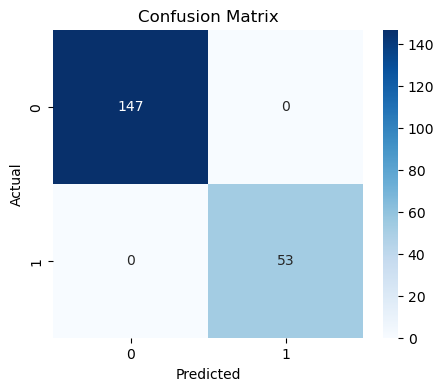

In [29]:


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print (f"Accuracy_score: {accuracy}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


9. EDA – Temperature Distribution

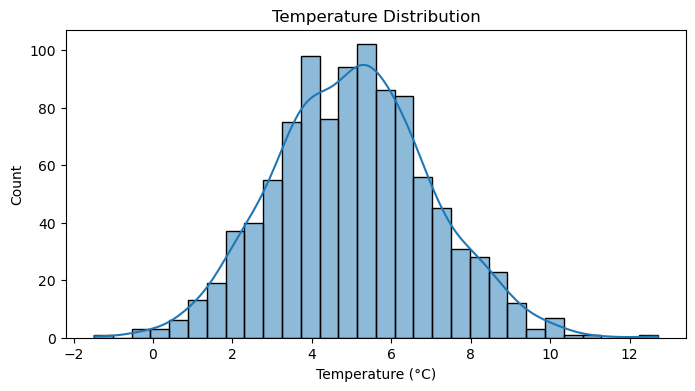

In [30]:

plt.figure(figsize=(8,4))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

 10. EDA – Humidity Distribution

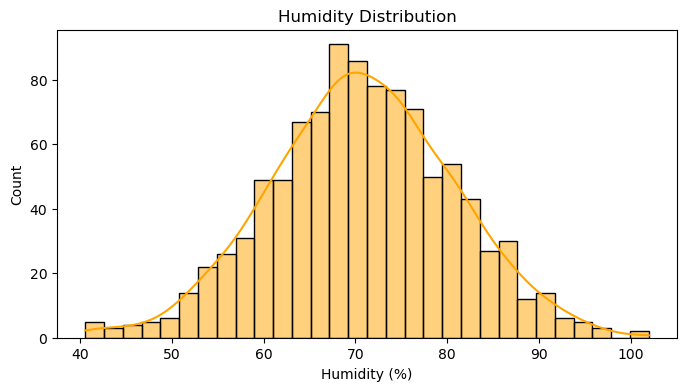

In [31]:

plt.figure(figsize=(8,4))
sns.histplot(df['Humidity'], bins=30, kde=True, color="orange")
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.ylabel("Count")
plt.show()


11. EDA – Correlation Matrix

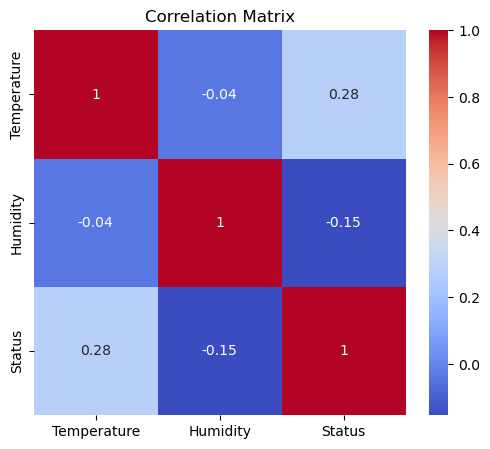

In [32]:

plt.figure(figsize=(6,5))
sns.heatmap(df[['Temperature', 'Humidity', 'Status']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Step 12: Save trained model and scaler for deployment

In [33]:

import joblib

joblib.dump(model, "coldroom_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


Step 13: Deploy with Streamlit for real-time predictions

In [34]:
# ================================
# Reload and Test the Model
# ================================
loaded_model = joblib.load("coldroom_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [35]:
# Test with one sample input
sample = [[5, 60]]  # Example: Temp=5°C, Humidity=60%
sample_scaled = loaded_scaler.transform(sample)
print("\nTest Prediction for sample [Temp=5, Humidity=60]:",
      loaded_model.predict(sample_scaled))


Test Prediction for sample [Temp=5, Humidity=60]: [1]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
